<a href="https://colab.research.google.com/github/BIAS04/Deep-Learning/blob/main/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DeepLearning


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import pandas as pd

In [2]:

df = pd.DataFrame({
    "soil_moisture": [0.10, 0.15, 0.20, 0.25, 0.40, 0.60, 0.35, 0.18,
                      0.45, 0.05, 0.80, 0.27, 0.55, 0.70, 0.12, 0.30],
    "temperature_c": [34, 30, 26, 22, 28, 30, 19, 22,
                      35, 24, 33, 33, 21, 25, 20, 29],
    "sunlight_hours": [9, 8, 7, 4, 8, 10, 3, 10,
                       12, 5, 9, 11, 2, 6, 1, 9],
    "needs_water": [1, 1, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 1, 0, 0, 1, 1]
})

In [3]:
df

,soil_moisture,temperature_c,sunlight_hours,needs_water
0,0.10,34,9,1
1,0.15,30,8,1
2,0.20,26,7,1
3,0.25,22,4,0
4,0.40,28,8,0
5,0.60,30,10,0
6,0.35,19,3,0
7,0.18,22,10,1
8,0.45,35,12,0
9,0.05,24,5,1


In [4]:
df.columns

Index(['soil_moisture', 'temperature_c', 'sunlight_hours', 'needs_water'], dtype='object')

In [5]:
X = df[['soil_moisture', 'temperature_c', 'sunlight_hours']]
y = df['needs_water']


In [6]:
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min + 1e-8)

In [7]:
X_scaled

,soil_moisture,temperature_c,sunlight_hours
0,0.066667,0.9375,0.727273
1,0.133333,0.6875,0.636364
2,0.200000,0.4375,0.545455
3,0.266667,0.1875,0.272727
4,0.466667,0.5625,0.636364
5,0.733333,0.6875,0.818182
6,0.400000,0.0000,0.181818
7,0.173333,0.1875,0.818182
8,0.533333,1.0000,1.000000
9,0.000000,0.3125,0.363636


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.35, random_state=42, stratify=y
)

In [10]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras import optimizers

In [13]:
opt = optimizers.SGD(learning_rate = 0.01, momentum = 0.9)

In [15]:
model.compile(optimizer= opt ,loss = 'binary_crossentropy',metrics= ['accuracy'])

In [18]:
history_full = model.fit(X_train, y_train, epochs=100, batch_size=len(X_train), verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 100,batch_size = 1 , verbose = 1 # Make sure to specify your epochs here too!
)

history_minibatch = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.1688
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.1684
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.1679
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.1675
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.1671
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.1667
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.1663
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.1659
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.1655
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.1651
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.1647
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - lo

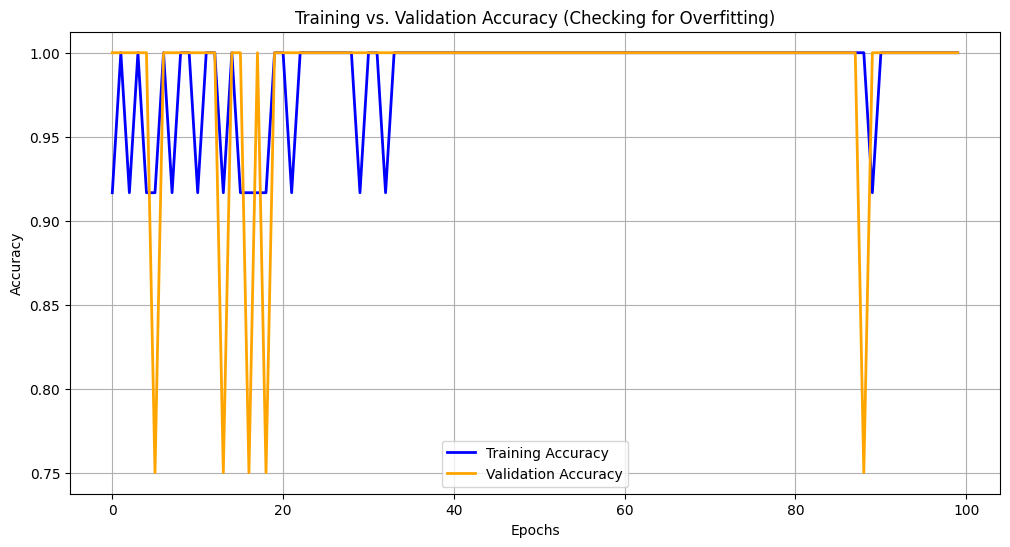

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy from the stochastic model
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)

plt.title('Training vs. Validation Accuracy (Checking for Overfitting)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()